In [53]:
#model v1 working

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation, MaxPooling2D, Dropout

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

import os
import cv2

# from tensorflow import keras
# from keras.tensorflow.keras import layers
# from keras.utils import to_categorical

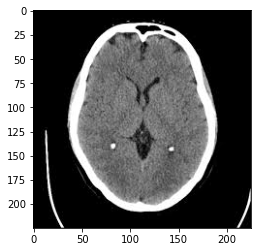

In [54]:
#LOADING OWN DATA

DATADIR = r"C:\Users\chris\Downloads\CT"
CATEGORIES = ["Control", "Necrosis", "Tumor"]

for category in CATEGORIES:
  path = os.path.join(DATADIR, category) #path to CT
  for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) 
        #note that I want to use colors in second version
        plt.imshow(img_array, cmap="gray" )
        plt.show()
        break
  break

In [55]:
print(img_array.shape)

(225, 225)


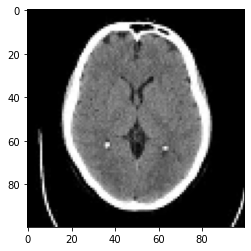

In [56]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [57]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create path
        class_num = CATEGORIES.index(category)  # get the classification  (0 1, 2)

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 2666.54it/s]

85


In [58]:
print(len(training_data))
print(len(img_array))
print(len(new_array))


85
225
100


In [59]:
import random
random.shuffle(training_data)

In [60]:
for sample in training_data[:10]:
    print(sample[1])

0
1
2
2
2
2
0
2
0
1


In [61]:
X = []
y =[]
    

In [62]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [63]:
import pickle

pickle_out =open('Q.pickle', "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("t.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [64]:
pickle_in = open("Q.pickle", "rb")
X = pickle.load(pickle_in)

In [65]:
X[1]

array([[[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  3],
        [160]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  2],
        [160]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  3],
        [160]],

       ...,

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  3],
        [160]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  2],
        [160]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  3],
        [160]]], dtype=uint8)

In [66]:
# CREATING THE MODEL WITH OUR LOADED DATA

#for future reference...
# A nice alternative to pickle is
# np.save('features.npy',X) #saving
# X=np.load('features.npy')#loading

import tensorflow as tf
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation, MaxPooling2D, Dropout


X = pickle.load(open("Q.pickle","rb"))
y = pickle.load(open("t.pickle","rb"))

X = np.array(X/255.0)
y = np.array(y)

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))
          
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])
          
model.fit(X, y, batch_size=32, epochs = 10, validation_split=0.1)

Epoch 1/10
3/3 [==============================] - 0s 128ms/step - loss: 0.3483 - accuracy: 0.3026 - val_loss: 1.6768 - val_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 89ms/step - loss: -0.5720 - accuracy: 0.2895 - val_loss: 7.5498 - val_accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 0s 90ms/step - loss: -0.1501 - accuracy: 0.2895 - val_loss: 15.1881 - val_accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 0s 90ms/step - loss: -2.6497 - accuracy: 0.2895 - val_loss: 27.2945 - val_accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 0s 93ms/step - loss: -5.6705 - accuracy: 0.2895 - val_loss: 56.5029 - val_accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 0s 89ms/step - loss: -10.4008 - accuracy: 0.2895 - val_loss: 126.5496 - val_accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 0s 89ms/step - loss: 1.5632 - accuracy: 0.2895 - val_loss: 198.5519 - val_accura

In [67]:
model.evaluate(X, y)
#[loss, accuracy]

3/3 [==============================] - 0s 30ms/step - loss: -8.3965 - accuracy: 0.2588


[-8.396520614624023, 0.25882354378700256]

In [68]:
model.save('CTv1.model')

INFO:tensorflow:Assets written to: CTv1.model\assets


In [69]:
import cv2
import tensorflow as tf

CATEGORIES = ["Control", "Necrosis", "Tumor"]

def prepare(filepath):
    IMG_SIZE = 100  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("Ctv1.model")
#prediction = model.predict([prepare(r'C:\Users\chris\Downloads\CT\testBrainTumor.jpg')])

prediction = model.predict([prepare(r'C:\Users\chris\Downloads\CT\testBrainTumor.jpg')])

print(prediction)

print(CATEGORIES[int(prediction[0][0])] )

In [70]:
prediction = model.predict([prepare(r'C:\Users\chris\Downloads\CT\testBrainTumor.jpg')])

In [71]:
print(prediction)

[[1.]]


In [72]:

print(CATEGORIES[int(prediction[0][0])] )
#print(100 * predictions)

Necrosis


In [73]:
#can continue retraining model with new inputs after loading
#model.fit(newData, target, batch_size=32, epochs = 10, validation_split=0.25)
#would have a file for collecting newly labeled data, and a trigger for the following;
#will likely require having an additional data input, curate, train, and save
#which would be followed by the statement of the new accuracy

In [74]:
btn_upload = widgets.FileUpload()
btn_upload

NameError: name 'widgets' is not defined

In [459]:
#Creating widget U.I.

#run interact for initiating retrain https://youtu.be/HY7cf-CYs1o?t=876
import ipywidgets as widgets


myupload = widgets.FileUpload(
    accept='.jpg',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)
myupload

FileUpload(value={}, accept='.jpg', description='Upload')

In [389]:
#myupload.value
# uploaded_filename = next(iter(myupload.value))
# content = myupload.value[uploaded_filename]['content']
# with open('myfile', 'wb') as f: f.write(content)

In [397]:
# myupload.value

In [555]:
# !pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *


In [556]:
btn_upload = widgets.FileUpload()
btn_upload
# img = PILImage.create(btn_upload.data)


FileUpload(value={}, description='Upload')

In [557]:
img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(70,70))
out_pl

IndexError: list index out of range

In [558]:
# prediction = model.predict(img)

In [559]:
# #test
# from IPython.display import display
# import FileUpload

# uploader = fileupload.FileUploadWidget()

# def _handle_upload(change):
#     w = change['owner']
#     with open(w.filename, 'wb') as f:
#         f.write(w.data)
#     print('Uploaded `{}` ({:.2f} kB)'.format(
#         w.filename, len(w.data) / 2**10))

# uploader.observe(_handle_upload, names='data')

# display(uploader)

In [560]:
from ipywidgets import FileUpload

def on_upload_change(change):
    if not change.new:
        return
    up = change.owner
    for filename,data in up.value.items():
        print(f'{filename}')
        with open(filename, 'wb') as f:
            f.write(data['content'])
    up.value.clear()
    up._counter = 0

upload_btn = FileUpload()
upload_btn.observe(on_upload_change, names='_counter')
upload_btn

FileUpload(value={}, description='Upload')

In [561]:
# from ipywidgets import FileUpload

# def on_upload_change(change):
#     if not change.new:
#         return
#     up = change.owner
#     for filename,data in up.value.items():
#         print(f'writing [{filename}] to /Uploadsv1')
#         with open(filename, 'wb') as f:
#             f.write(data['content'])
#             temp = f
#     up.value.clear()
#     up._counter = 0

# upload_btn = FileUpload()
# upload_btn.observe(on_upload_change, names='_counter')
# upload_btn


In [548]:
# btn_upload = widgets.FileUpload()
# btn_upload

img = PILImage.create(upload_btn.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(70,70))
out_pl

#Should Display uploaded image; working

IndexError: list index out of range

In [550]:
prediction = model.predict([prepare(###)])
print(CATEGORIES[int(prediction[0][0])] )
#two main issues;
# 1 : all of them save to the current directory; not what I want
# 2 : I have to rename the variable manually after upload to get a prediction

#If I fix 2 I can move to setting up an initial binder and voila

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
